In [16]:
# load the data that has anomaly data 
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


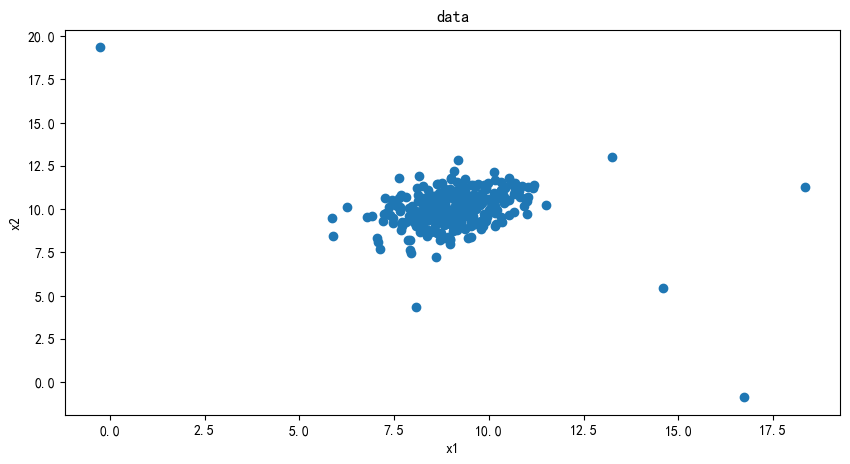

In [17]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize = (10,5))
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [18]:
#define x1 and x2
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

In [19]:
# coding:utf-8
import matplotlib as mlp
font = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False

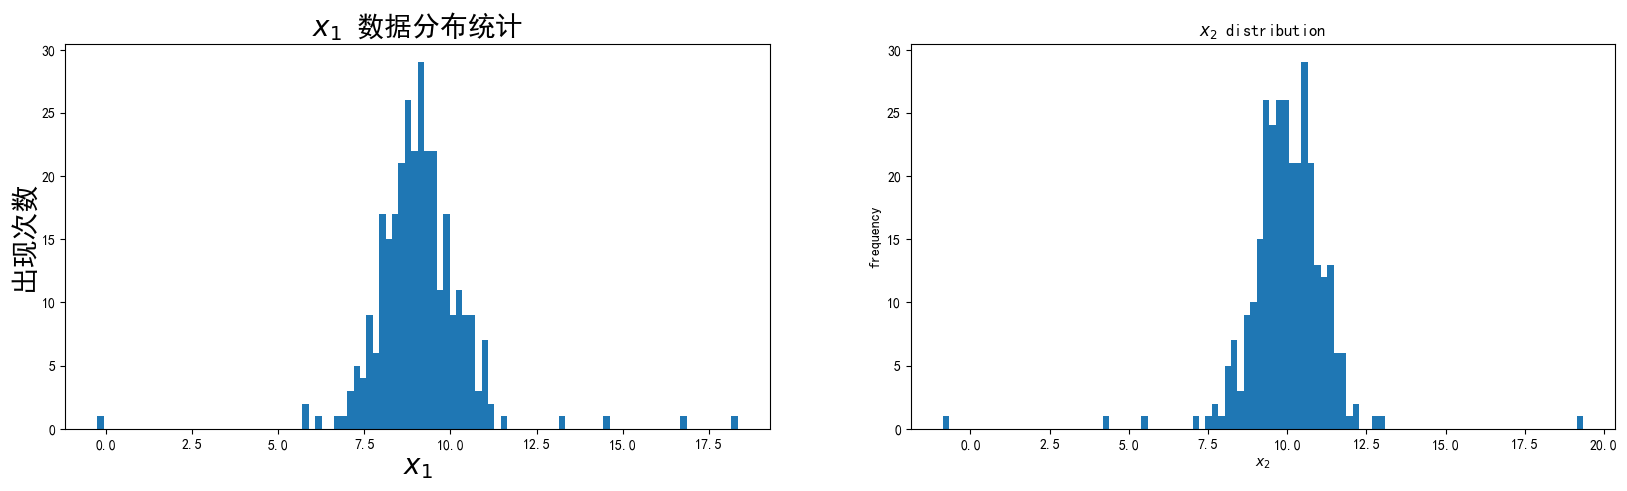

In [20]:
fig2 = plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('$x_1$ 数据分布统计',font)
plt.xlabel('$x_1$',font)
plt.ylabel('出现次数',font)

plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('$x_2$ distribution')
plt.xlabel('$x_2$')
plt.ylabel('frequency')
plt.show()

In [21]:
# calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()

x2_mean = x2.mean()
x2_sigma = x2.std()

print(x1_mean, x1_sigma, x2_mean, x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.30970711753864


In [22]:
# calcualte the gaussian distribution p(x)
from scipy.stats import norm

x1_range = np.linspace(0, 20, 300)
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)

x2_range = np.linspace(0, 20, 300)
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

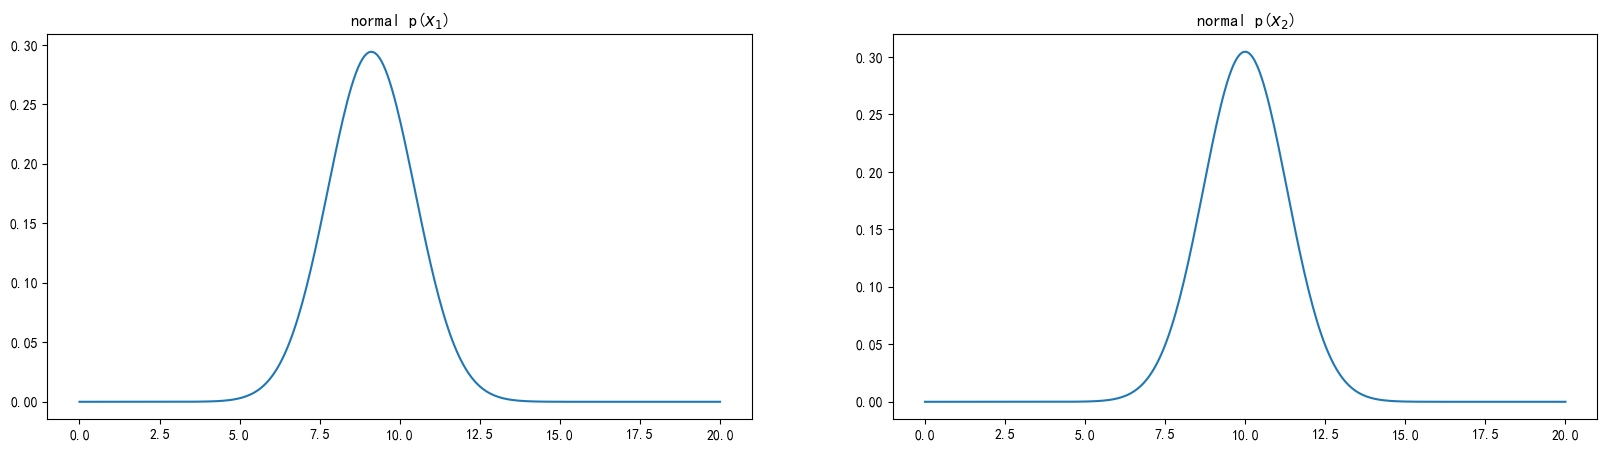

In [23]:
# visualize the p(x)
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('normal p($x_1$)')
plt.plot(x1_range,x1_normal)

plt.subplot(122)
plt.title('normal p($x_2$)')
plt.plot(x2_range,x2_normal)

plt.show()

In [28]:
# establish the model and train 
from sklearn.covariance import EllipticEnvelope
# contamination: 8%
ad_model = EllipticEnvelope(contamination = 0.08)
ad_model.fit(data)

EllipticEnvelope(contamination=0.08)

In [29]:
# predict
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    282
-1     25
Name: count, dtype: int64


C:\Users\WindW\AppData\Local\Temp\ipykernel_51864\2668121840.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict))


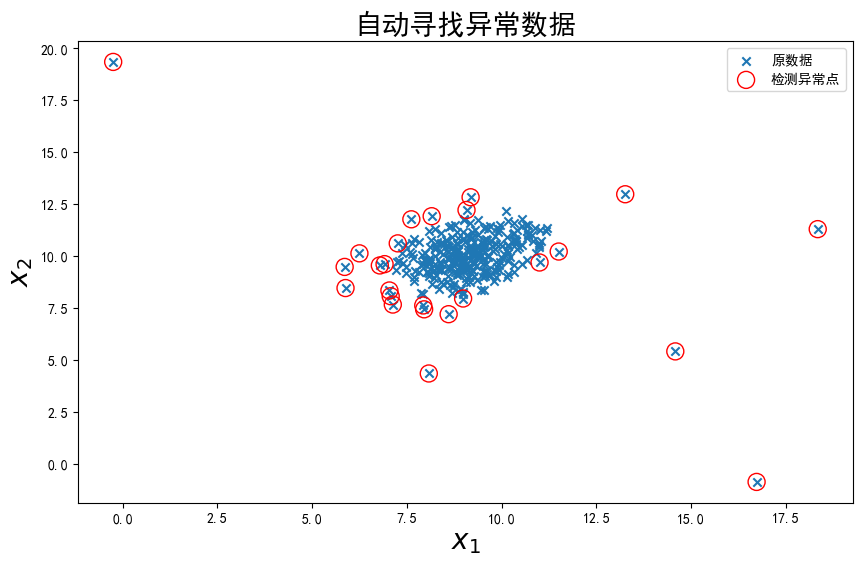

In [31]:
# visualize the result
fig4 = plt.figure(figsize=(10,6))
mask = y_predict == -1
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][mask],data.loc[:,'x2'][mask],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('自动寻找异常数据',font)
plt.xlabel('$x_1$',font)
plt.ylabel('$x_2$',font)
plt.legend((orginal_data,anomaly_data),('原数据','检测异常点'))
# plt.axis([4.5,15,2.5,15])
plt.show()

 1    300
-1      7
Name: count, dtype: int64


C:\Users\WindW\AppData\Local\Temp\ipykernel_51864\4087759501.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict2))


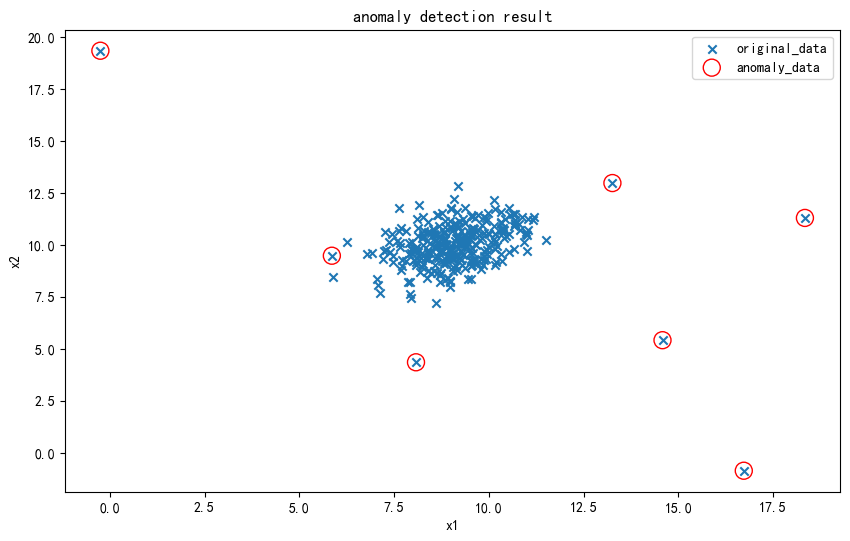

In [27]:
# contamination: 2%
ad_model2 = EllipticEnvelope(contamination = 0.02)
ad_model2.fit(data)
y_predict2 = ad_model2.predict(data)
print(pd.value_counts(y_predict2))
# visualize the result
fig5 = plt.figure(figsize=(10,6))
mask2 = y_predict2 == -1

orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][mask2],data.loc[:,'x2'][mask2],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('original_data','anomaly_data'))
plt.show()